In [17]:
import numpy as np
import pandas as pd

# 1. 학생 성적 분석 데이터 읽기

In [64]:
# 다항 선형 회귀
data = pd.read_csv('student-mat.csv')

# 평균 성적 column 추가
data['avg'] =(data['G1'] + data['G2'] + data['G3'])/3

# 필요없는 column 버리기
data.drop(columns = ['sex', 'Mjob', 'Fjob', 'schoolsup', 'activities', 'internet', 'romantic', 'school', 'address', 'famsize', 
                      'Pstatus', 'reason', 'guardian', 'failures', 'famsup', 'paid', 'nursery', 'higher', 'Dalc', 'Walc',
                      'G1', 'G2', 'G3'], inplace = True)
print data

X = np.c_[data['age'], data['Medu'], data['Fedu'], data['traveltime'], data['studytime'], data['famrel'], data['freetime'],
           data['goout'], data['health'], data['absences']]
y = data['avg']
m = len(data)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  health  \
0     18     4     4           2          2       4         3      4       3   
1     17     1     1           1          2       5         3      3       3   
2     15     1     1           1          2       4         3      2       3   
3     15     4     2           1          3       3         2      2       5   
4     16     3     3           1          2       4         3      2       5   
5     16     4     3           1          2       5         4      2       5   
6     16     2     2           1          2       4         4      4       3   
7     17     4     4           2          2       4         1      4       1   
8     15     3     2           1          2       4         2      2       1   
9     15     3     4           1          2       5         5      1       5   
10    15     4     4           1          2       3         3      3       2   
11    15     2     1           3        

In [65]:
# numpy array 형태로 변환
X = (np.array(X)).reshape(m,10)
y = (np.array(y)).reshape(m,1)
print X.shape, y.shape

(395, 10) (395, 1)


# 2. 각 특성에 따른 그래프 분포

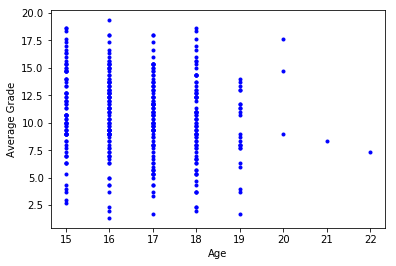

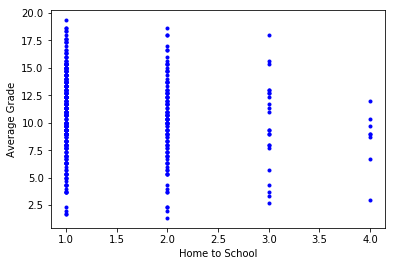

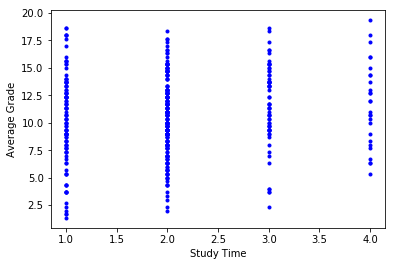

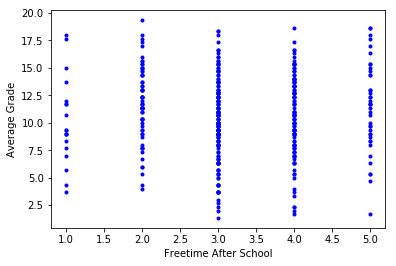

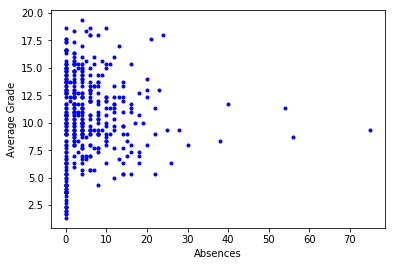

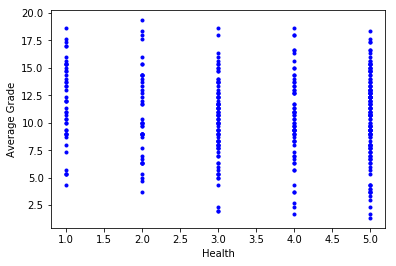

In [66]:
# 나이에 따른 평균 점수
plt.plot(X1[:, 0].reshape(-1), y, 'b.')
plt.xlabel('Age')
plt.ylabel('Average Grade')
plt.show()

# 등교 시간에 따른 평균 점수
plt.plot(X1[:, 3].reshape(-1), y, 'b.')
plt.xlabel('Home to School')
plt.ylabel('Average Grade')
plt.show()

# 공부 시간에 따른 평균 점수
plt.plot(X1[:, 4].reshape(-1), y, 'b.')
plt.xlabel('Study Time')
plt.ylabel('Average Grade')
plt.show()

# 방과 후 자유시간에 따른 평균 점수
plt.plot(X1[:, 6].reshape(-1), y, 'b.')
plt.xlabel('Freetime After School')
plt.ylabel('Average Grade')
plt.show()

# 출석률에 따른 평균 점수
plt.plot(X1[:, 9].reshape(-1), y, 'b.')
plt.xlabel('Absences')
plt.ylabel('Average Grade')
plt.show()

# 건강 상태에 따른 평균 점수
plt.plot(X1[:, 8].reshape(-1), y, 'b.')
plt.xlabel('Health')
plt.ylabel('Average Grade')
plt.show()

# 3. Feature Normalization

In [67]:
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    
    X_norm = (X - mu) / std
    
    return X_norm, mu, std

In [68]:
# Feature Normalization
X, mu, std = featureNormalize(X)
print X.shape

(395, 10)


# 4. Gradient Descent

### -Hyperparameter

In [141]:
learning_rate = 0.00193
n_iter = 400

In [142]:
# Gradient Descent
X_b = np.c_[np.ones((m, 1)), X]

theta = np.random.randn(11,1)
gradients = np.zeros((11,1))

for i in range (n_iter):
    gradients = 2.0/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
print 'theta:'
print theta

theta:
[[ 8.62347695e+00]
 [-2.29538169e-01]
 [ 3.07684206e-01]
 [ 6.15959598e-01]
 [ 1.44407082e-03]
 [ 1.66337258e-01]
 [-5.49582925e-02]
 [ 7.04728340e-02]
 [-4.58236386e-01]
 [-4.10350956e-01]
 [-3.05564369e-01]]


# 5. 임의의 학생 분석 데이터에 대한 성적 예측

In [143]:
# 평균 성적 예측
X_mine = np.array([[15, 3, 3, 1, 2, 5, 3, 2, 2, 0]])
X_mine = (X_mine - mu) / std
print X_mine

X_mine_b = np.c_[np.ones((1,1)), X_mine]
y_predict = X_mine_b.dot(theta)
print y_predict

[[-1.33095364  0.22923423  0.44025694 -0.64324947 -0.04228585  1.17886012
  -0.2360102  -0.99729526 -1.11946915 -0.71423623]]
[[10.31592815]]
